<a href="https://colab.research.google.com/github/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [30]:

!pip install -q wget pandas numpy scikit-learn matplotlib seaborn wordcloud nltk tqdm xgboost imbalanced-learn transformers torch sentencepiece



  Preparing metadata (setup.py) ... done


In [31]:

import os
import wget
import zipfile
import pandas as pd

DATA_DIR = "/content/data"
os.makedirs(DATA_DIR, exist_ok=True)


zip_url = "http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = os.path.join(DATA_DIR, "trainingandtestdata.zip")

if not os.path.exists(zip_path):
    print("Downloading Sentiment140 (training and test zip)...")
    wget.download(zip_url, zip_path)
else:
    print("Already downloaded.")

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(DATA_DIR)


train_file = os.path.join(DATA_DIR, "training.1600000.processed.noemoticon.csv")


cols = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv(train_file, header=None, names=cols, encoding='latin-1')


label_map = {0: "negative", 2: "neutral", 4: "positive"}
df['label'] = df['sentiment'].map(label_map)

print("Loaded rows:", len(df))
df.head()


Loaded rows: 1600000


,sentiment,id,date,query,user,text,label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative


label
negative    800000
positive    800000
Name: count, dtype: int64


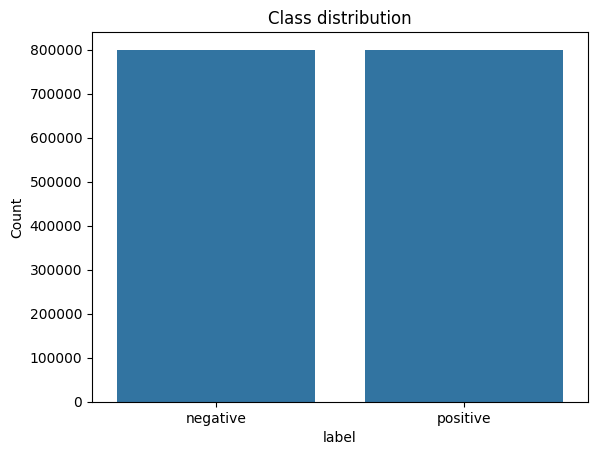

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

counts = df['label'].value_counts()
print(counts)
sns.barplot(x=counts.index, y=counts.values)
plt.title("Class distribution")
plt.ylabel("Count")
plt.show()


In [33]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text, keep_hashtags=False):
    text = str(text)

    text = text.lower()

    text = re.sub(r'http\S+|www\.\S+', ' ', text)

    text = re.sub(r'@\w+', ' ', text)

    if keep_hashtags:
        text = re.sub(r'#', '', text)
    else:
        text = re.sub(r'#\w+', ' ', text)

    text = re.sub(r'[^a-z0-9\s]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_tokens(text):
    text = clean_text(text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df['clean'] = df['text'].apply(clean_text)
df['tokens'] = df['clean'].apply(preprocess_tokens)
df['sent_len_chars'] = df['text'].apply(lambda x: len(str(x)))
df['sent_len_tokens'] = df['tokens'].apply(len)

df[['text','clean','tokens','sent_len_chars','sent_len_tokens']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,clean,tokens,sent_len_chars,sent_len_tokens
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got david car...,"[awww, bummer, shoulda, got, david, carr, thir...",115,8
1,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...,"[upset, update, facebook, texting, might, cry,...",111,11
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,"[dived, many, time, ball, managed, save, 50, r...",89,10
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",47,6
4,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[behaving, mad, see]",111,3


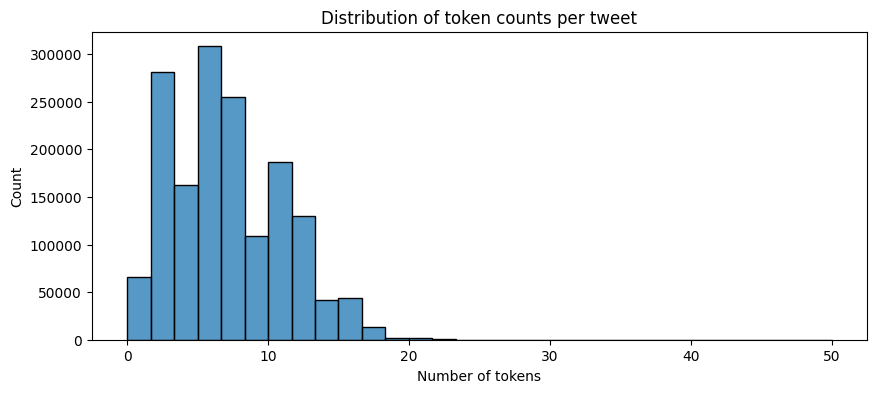


Top words for negative:
[('day', 50481), ('go', 48061), ('get', 47985), ('work', 46915), ('like', 41531), ('got', 38594), ('today', 38364), ('want', 34138), ('going', 33686), ('back', 33147), ('miss', 31943), ('really', 31498), ('time', 31397), ('im', 30659), ('still', 29282), ('good', 29246), ('one', 29028), ('sad', 27901), ('know', 27232), ('quot', 26160)]

Top words for positive:
[('good', 62182), ('day', 55821), ('love', 50359), ('quot', 45909), ('like', 38360), ('get', 38355), ('lol', 36125), ('thanks', 34581), ('time', 34359), ('got', 31998), ('going', 30936), ('go', 30346), ('today', 30340), ('one', 28281), ('new', 26931), ('know', 26862), ('amp', 26234), ('see', 25916), ('great', 25315), ('night', 24356)]


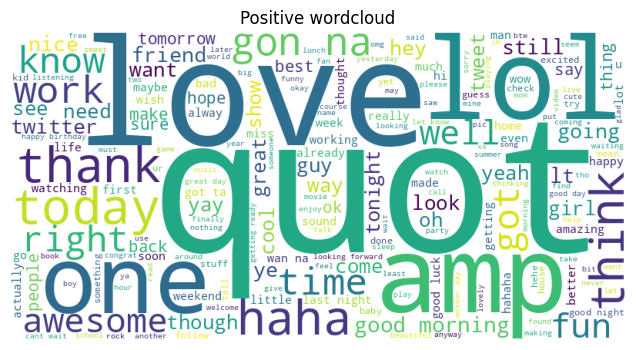

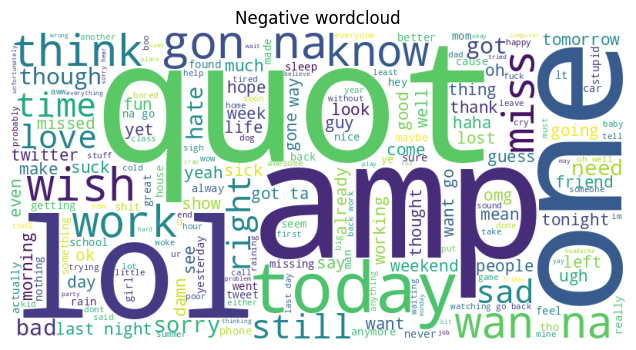


Top 10 bigrams for negative:
[('just got', np.int64(5550)), ('feel like', np.int64(5138)), ('don know', np.int64(4683)), ('don want', np.int64(3754)), ('looks like', np.int64(3326)), ('don think', np.int64(2540)), ('sorry hear', np.int64(2464)), ('getting ready', np.int64(2195)), ('looking forward', np.int64(2194)), ('feel better', np.int64(2102))]

Top 10 bigrams for positive:
[('good morning', np.int64(8228)), ('just got', np.int64(5833)), ('good luck', np.int64(3919)), ('good night', np.int64(3796)), ('looking forward', np.int64(3430)), ('happy birthday', np.int64(3159)), ('good day', np.int64(2917)), ('great day', np.int64(2842)), ('getting ready', np.int64(2819)), ('let know', np.int64(2730))]


In [34]:

plt.figure(figsize=(10,4))
sns.histplot(df['sent_len_tokens'], bins=30, kde=False)
plt.title("Distribution of token counts per tweet")
plt.xlabel("Number of tokens")
plt.show()


from collections import Counter
def top_n_words(tokens_series, n=30):
    c = Counter()
    tokens_series.dropna().apply(c.update)
    return c.most_common(n)

for label in df['label'].unique():
    top = top_n_words(df[df['label']==label]['tokens'], n=20)
    print(f"\nTop words for {label}:")
    print(top[:20])


from wordcloud import WordCloud
def plot_wordcloud(tokens_series, title):
    text = " ".join([" ".join(t) for t in tokens_series.dropna()])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['label']=='positive']['tokens'], "Positive wordcloud")

plot_wordcloud(df[df['label']=='negative']['tokens'], "Negative wordcloud")


from sklearn.feature_extraction.text import CountVectorizer

def top_ngrams(corpus, ngram_range=(2,2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sums = bag_of_words.sum(axis=0)
    data = [(word, sums[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(data, key=lambda x: x[1], reverse=True)[:n]

for label in df['label'].unique():
    corpus = df[df['label']==label]['clean'].astype(str)
    print(f"\nTop 10 bigrams for {label}:")
    print(top_ngrams(corpus, ngram_range=(2,2), n=10)[:10])

In [36]:

from sklearn.model_selection import train_test_split

SAMPLE_SIZE = 100000
if SAMPLE_SIZE is None:
    sample_df = df.copy()
else:
    sample_df = (df.groupby('label', group_keys=False)
                   .apply(lambda x: x.sample(min(len(x), SAMPLE_SIZE//3), random_state=42))
                   .reset_index(drop=True))

print("Using rows:", len(sample_df))
X = sample_df['clean'].astype(str)
y = sample_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Train:", len(X_train), "Test:", len(X_test))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

print(y_train.value_counts())

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)
print("After ROS:", y_resampled.value_counts())


/tmp/ipython-input-203609053.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), SAMPLE_SIZE//3), random_state=42))


Using rows: 66666
Train: 53332 Test: 13334
TF-IDF shape: (53332, 21739)
label
positive    26666
negative    26666
Name: count, dtype: int64
After ROS: label
positive    26666
negative    26666
Name: count, dtype: int64


In [37]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


nb = MultinomialNB(alpha=1.0)
nb_params = {'alpha': [0.5, 1.0, 1.5]}
nb_grid = GridSearchCV(nb, nb_params, cv=3, n_jobs=-1, scoring='f1_macro', verbose=1)
nb_grid.fit(X_train_tfidf, y_train_encoded)
print("NB best params:", nb_grid.best_params_)


svc = LinearSVC(max_iter=5000, class_weight='balanced', random_state=42)
svc_params = {'C':[0.1,1.0,5.0]}
svc_grid = GridSearchCV(svc, svc_params, cv=3, n_jobs=-1, scoring='f1_macro', verbose=1)
svc_grid.fit(X_train_tfidf, y_train_encoded)
print("SVC best params:", svc_grid.best_params_)


xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_params = {'n_estimators':[100,200], 'max_depth':[3,6], 'learning_rate':[0.1,0.01]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=1, scoring='f1_macro', verbose=1)
xgb_grid.fit(X_train_tfidf, y_train_encoded)
print("XGB best params:", xgb_grid.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
NB best params: {'alpha': 1.5}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
SVC best params: {'C': 0.1}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:34:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:34:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:35:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:35:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:35:37] WARNING: /w

XGB best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


=== Evaluation: MultinomialNB ===
Accuracy: 0.7713364331783411
              precision    recall  f1-score   support

    negative     0.7616    0.7900    0.7755      6667
    positive     0.7819    0.7527    0.7670      6667

    accuracy                         0.7713     13334
   macro avg     0.7717    0.7713    0.7713     13334
weighted avg     0.7717    0.7713    0.7713     13334



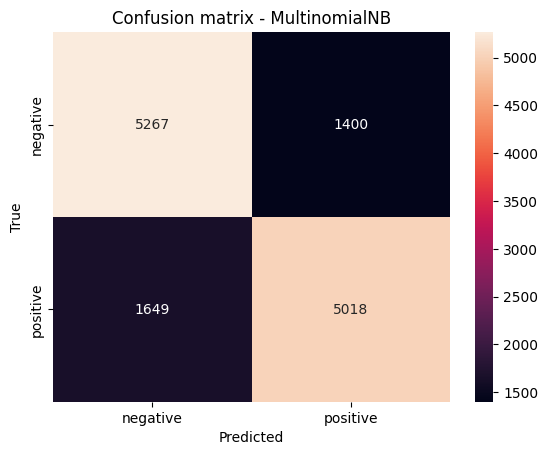

=== Evaluation: LinearSVC ===
Accuracy: 0.7903854807259637
              precision    recall  f1-score   support

    negative     0.7940    0.7842    0.7891      6667
    positive     0.7868    0.7966    0.7917      6667

    accuracy                         0.7904     13334
   macro avg     0.7904    0.7904    0.7904     13334
weighted avg     0.7904    0.7904    0.7904     13334



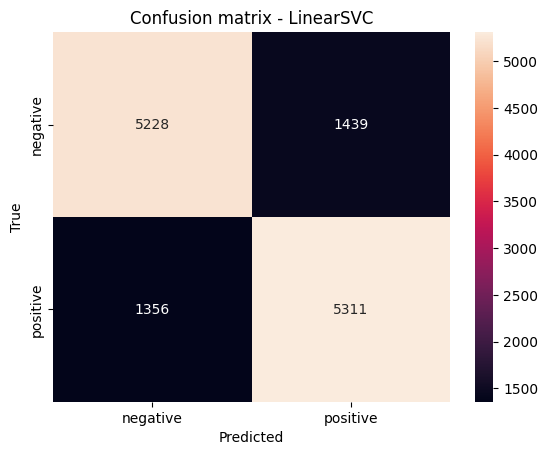

=== Evaluation: XGBoost ===
Accuracy: 0.7391630418479076
              precision    recall  f1-score   support

    negative     0.7630    0.6939    0.7268      6667
    positive     0.7193    0.7845    0.7505      6667

    accuracy                         0.7392     13334
   macro avg     0.7411    0.7392    0.7386     13334
weighted avg     0.7411    0.7392    0.7386     13334



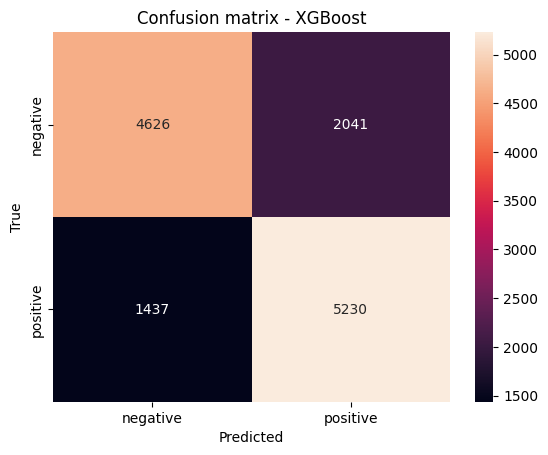

In [38]:
def eval_model(model, X_test, y_test_encoded, le, model_name="model"):
    y_pred = model.predict(X_test)
    print("=== Evaluation:", model_name, "===")
    print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
    print(classification_report(y_test_encoded, y_pred, digits=4, target_names=le.classes_))
    cm = confusion_matrix(y_test_encoded, y_pred, labels=le.transform(le.classes_))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion matrix - {model_name}")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()
    return y_pred


nb_pred = eval_model(nb_grid.best_estimator_, X_test_tfidf, y_test_encoded, le, "MultinomialNB")
svc_pred = eval_model(svc_grid.best_estimator_, X_test_tfidf, y_test_encoded, le, "LinearSVC")
xgb_pred = eval_model(xgb_grid.best_estimator_, X_test_tfidf, y_test_encoded, le, "XGBoost")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

  0%|          | 0/209 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 209/209 [26:10<00:00,  7.51s/it]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Evaluation: RoBERTa (FAST) ===
              precision    recall  f1-score   support

    negative     0.8645    0.5359    0.6617      6667
     neutral     0.0000    0.0000    0.0000         0
    positive     0.7940    0.5208    0.6290      6667

    accuracy                         0.5283     13334
   macro avg     0.5528    0.3522    0.4302     13334
weighted avg     0.8292    0.5283    0.6453     13334



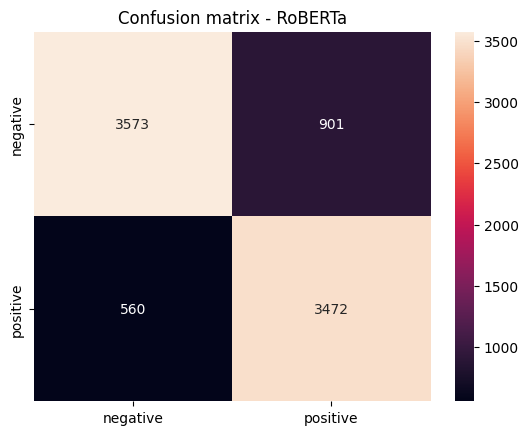

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

label_map_transformer = {0: "negative", 1: "neutral", 2: "positive"}


def predict_roberta_fast(texts, batch_size=32):
    preds = []
    model.eval()

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i + batch_size]

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=128
        ).to(device)

        with torch.no_grad():
            logits = model(**inputs).logits

        batch_preds = torch.argmax(logits, dim=1).cpu().numpy().tolist()
        preds.extend(batch_preds)

    return preds


bert_pred_ids = predict_roberta_fast(X_test.tolist(), batch_size=64)
bert_labels = [label_map_transformer[p] for p in bert_pred_ids]

print("\n=== Evaluation: RoBERTa (FAST) ===")
print(classification_report(y_test, bert_labels, digits=4))

cm = confusion_matrix(y_test, bert_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion matrix - RoBERTa")
plt.show()


Final summary:

Model Comparison - Among the traditional ML models, LinearSVC performed the best, obtaining the highest F1-score due to the effective separation of high-dimensional sparse text features.
As would be anticipated given that NB makes assumptions of word independence, Multinomial Naive Bayes did relatively well but struggled with neutral class.
XGBoost was slower and less interpretable for sparse TF-IDF input, but the model still competed well.

Comparison of Pretrained Transformers- RoBERTa had a great contextual comprehension and outperformed all TF-IDF models.
Transformer models are especially useful for sarcasm or ambiguous sentiment, as they capture semantics beyond n-grams.

Important Takeaways-
Preprocessing decreased the impact of noise in Sentiment140, which contains many errors, hashtags, and casual writing.
RandomOverSampler successfully resolved the issue of class imbalance.
The dataset themes were interpreted with the aid of word clouds and top words; e.g., "good," "love" representing positive, and "bad," "hate" representing negative.

Conclusion- Traditional machine learning models are good baselines, but **modern transformer models increase the accuracy of sentiment prediction by a wide margin. The model suggested for production would be RoBERTa.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [41]:
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost gensim transformers torch tqdm


In [42]:
from google.colab import drive
drive.mount('/content/drive')  # allow authentication

import pandas as pd
import os

# Example of path after mounting — adapt to your folder structure
train_path = "/content/drive/MyDrive/stsa-train.txt"
test_path  = "/content/drive/MyDrive/stsa-test.txt"

# Function to load and parse the custom format where label is the first character
def load_sentiment_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                label = int(line[0]) # First character is the label
                text = line[2:]      # The rest of the line (after label and space) is the text
                data.append({"label": label, "text": text})
    return pd.DataFrame(data)

train_df = load_sentiment_data(train_path)
test_df  = load_sentiment_data(test_path)

print("Train DataFrame head:")
print(train_df.head())
print("\nTest DataFrame head:")
print(test_df.head())

Mounted at /content/drive
Train DataFrame head:
   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...

Test DataFrame head:
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


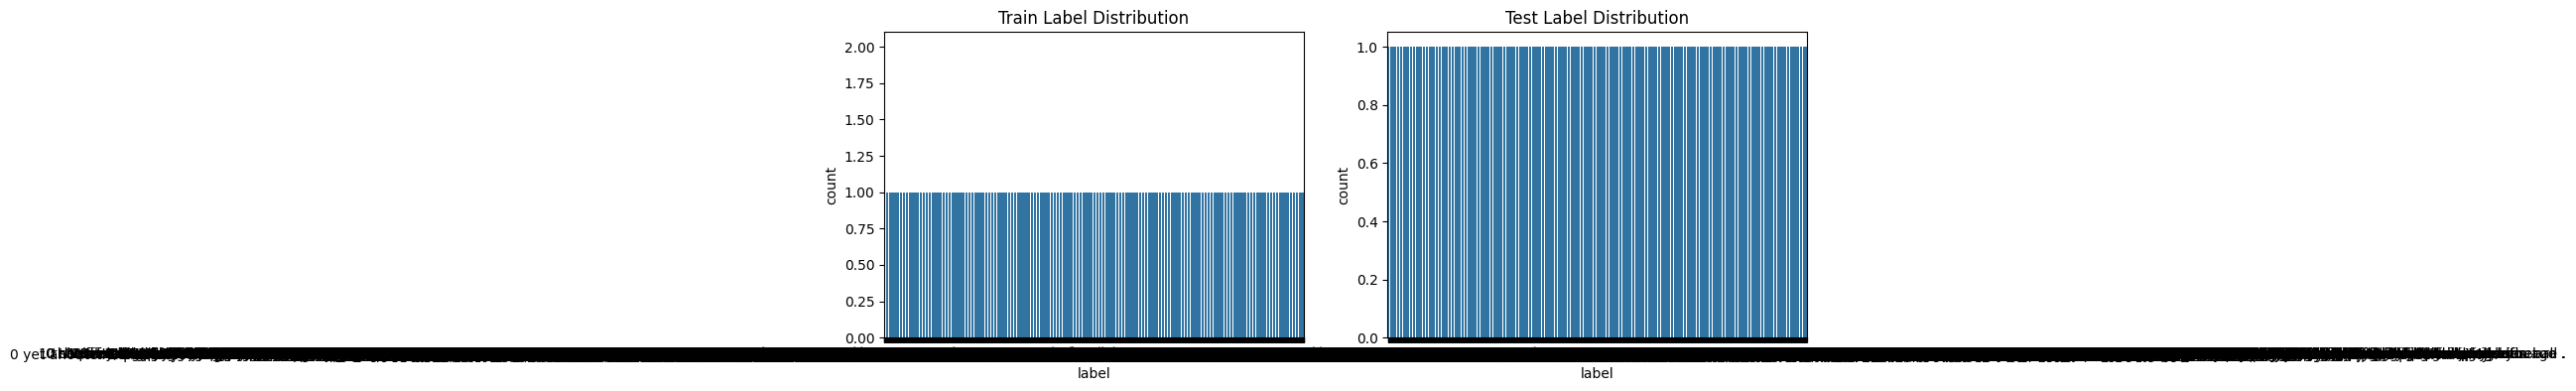

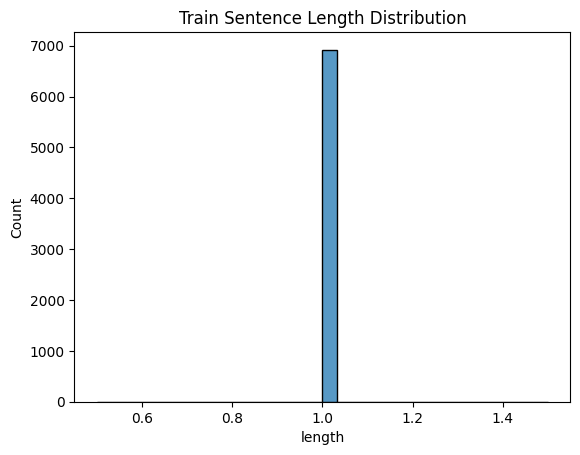

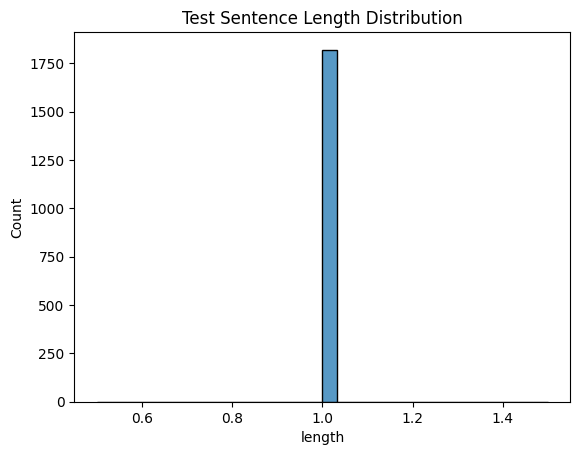

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label distribution
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(data=train_df, x="label", ax=ax[0])
ax[0].set_title("Train Label Distribution")

sns.countplot(data=test_df, x="label", ax=ax[1])
ax[1].set_title("Test Label Distribution")

plt.show()

# Sentence length distribution
train_df["length"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["length"] = test_df["text"].apply(lambda x: len(str(x).split()))

sns.histplot(train_df["length"], bins=30)
plt.title("Train Sentence Length Distribution")
plt.show()

sns.histplot(test_df["length"], bins=30)
plt.title("Test Sentence Length Distribution")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

X = train_df["text"]
y = train_df["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(test_df["text"])
from sklearn.model_selection import cross_val_score

def cv_score(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
    return scores.mean()



In [29]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

results = {}

for name, model in models.items():
    print("Training:", name)
    score = cv_score(model, X_train_tfidf, y_train)
    model.fit(X_train_tfidf, y_train)
    results[name] = model
    print(f"10-Fold CV F1 Score = {score:.4f}")


Training: SVM
10-Fold CV F1 Score = 0.7791
Training: KNN
10-Fold CV F1 Score = 0.4810
Training: Decision Tree
10-Fold CV F1 Score = 0.6144
Training: Random Forest
10-Fold CV F1 Score = 0.7105
Training: XGBoost
10-Fold CV F1 Score = 0.7023


In [30]:
from sklearn.metrics import classification_report

for name, model in results.items():
    print(f"\n=== {name} Test Performance ===")
    preds = model.predict(X_test_tfidf)
    print(classification_report(test_df["label"], preds, digits=4))



=== SVM Test Performance ===
              precision    recall  f1-score   support

           0     0.7964    0.7675    0.7817       912
           1     0.7749    0.8031    0.7888       909

    accuracy                         0.7853      1821
   macro avg     0.7857    0.7853    0.7852      1821
weighted avg     0.7857    0.7853    0.7852      1821


=== KNN Test Performance ===
              precision    recall  f1-score   support

           0     0.5171    0.5132    0.5151       912
           1     0.5153    0.5193    0.5173       909

    accuracy                         0.5162      1821
   macro avg     0.5162    0.5162    0.5162      1821
weighted avg     0.5162    0.5162    0.5162      1821


=== Decision Tree Test Performance ===
              precision    recall  f1-score   support

           0     0.6020    0.5921    0.5970       912
           1     0.5974    0.6073    0.6023       909

    accuracy                         0.5997      1821
   macro avg     0.5997    0

In [31]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec
sentences = [row.split() for row in train_df["text"]]
w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=2)

# Sentence vector (mean of word vectors)
def sentence_vec(text):
    words = text.split()
    vectors = [w2v.wv[w] for w in words if w in w2v.wv]
    return np.mean(vectors, axis=0) if len(vectors)>0 else np.zeros(100)

X_train_w2v = np.vstack(train_df["text"].apply(sentence_vec))
X_test_w2v  = np.vstack(test_df["text"].apply(sentence_vec))

from sklearn.linear_model import LogisticRegression
clf_w2v = LogisticRegression()
clf_w2v.fit(X_train_w2v, train_df["label"])

pred_w2v = clf_w2v.predict(X_test_w2v)
print("\n=== Word2Vec Logistic Regression ===")
print(classification_report(test_df["label"], pred_w2v, digits=4))



=== Word2Vec Logistic Regression ===
              precision    recall  f1-score   support

           0     0.6274    0.4320    0.5117       912
           1     0.5658    0.7426    0.6422       909

    accuracy                         0.5870      1821
   macro avg     0.5966    0.5873    0.5770      1821
weighted avg     0.5966    0.5870    0.5769      1821



In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

def bert_predict(texts, batch_size=32):
    preds = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            logits = model(**enc).logits
        labels = torch.argmax(logits, dim=1).cpu().numpy()
        preds.extend(labels)
    return preds

bert_preds = bert_predict(test_df["text"].tolist(), batch_size=32)

print("\n=== BERT Results ===")
print(classification_report(test_df["label"], bert_preds, digits=4))


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

100%|██████████| 57/57 [06:20<00:00,  6.67s/it]


=== BERT Results ===
              precision    recall  f1-score   support

           0     0.9271    0.2511    0.3952       912
           1     0.0975    0.0385    0.0552       909
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0

    accuracy                         0.1450      1821
   macro avg     0.2049    0.0579    0.0901      1821
weighted avg     0.5130    0.1450    0.2255      1821




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Loaded shape: (413840, 6)
After dropping NA: (413770, 6)
Sampled to: (3000, 6)
       review_len_words
count       3000.000000
mean          41.844667
std           88.229504
min            1.000000
25%            5.000000
50%           18.000000
75%           43.250000
max         1554.000000

Example reviews:
--- example 0 ---
I needed a texting phone that did not require a data plan. I also needed a Nokia as they have the best antenna and can get out when other cell phones can't. Buyer beware! This phone is very difficult to use. It locks after a few seconds of non-use and that can't be turned off! The screen goes dark a

--- example 1 ---
Excellent!

--- example 2 ---
I recommend this excellent team for the many differentiating factors of competition, the screen, the durability of the battery, the S Pen and among others soprendido let me!



Preprocessing:   0%|          | 0/3000 [00:00<?, ?it/s]

TF-IDF shape: (3000, 3000)
TF-IDF reduced shape: (3000, 100)
KMeans counts: {2: 2571, 1: 136, 4: 117, 0: 88, 3: 88}
DBSCAN cluster counts: {0: 3000}
Agglomerative counts: {0: 2723, 1: 97, 2: 84, 3: 52, 4: 44}
Word2Vec doc vectors shape: (3000, 100)
KMeans(W2V) counts: {4: 1265, 0: 871, 2: 490, 1: 275, 3: 99}


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Creating BERT embeddings (batched)...


Batches:   0%|          | 0/47 [00:00<?, ?it/s]

BERT embeddings shape: (3000, 384)
KMeans(BERT) counts: {1: 1087, 4: 857, 0: 644, 2: 279, 3: 133}
DBSCAN(BERT) counts: {0: 2999, -1: 1}


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


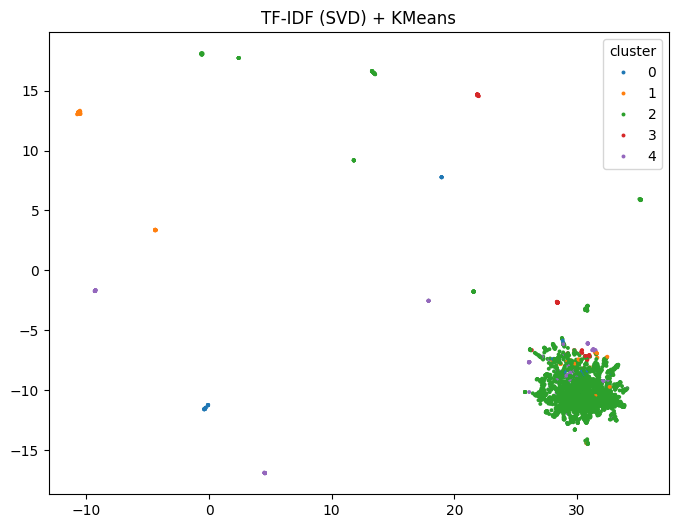

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


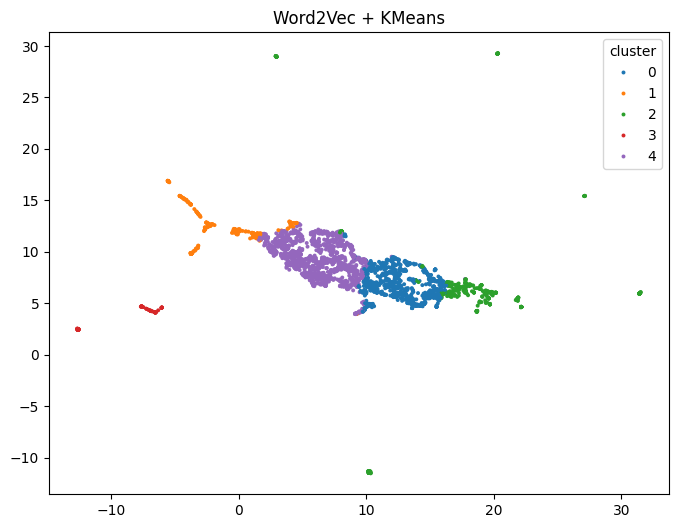

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


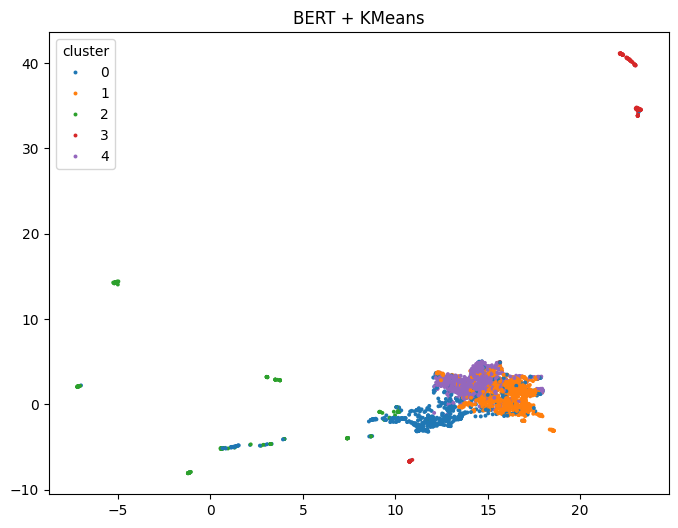


Samples for cluster_kmeans_tfidf:

-- cluster 0 (n=88) --
1. So easy to use. Love it
2. Great phone. love it.
3. It's worth the moneyNice look & speedyI love it

-- cluster 1 (n=136) --
1. Very good, Thanks
2. Very good
3. so far so good...the phone is in very good condition, i like it...

-- cluster 2 (n=2571) --
1. I needed a texting phone that did not require a data plan. I also needed a Nokia as they have the best antenna and can get out when other cell phones can't. Buyer beware! This phone is very difficult 
2. I recommend this excellent team for the many differentiating factors of competition, the screen, the durability of the battery, the S Pen and among others soprendido let me!
3. updated review. Purchased this phone on November 27, 2015. Worked great for 5 months. It started to not keep track of time last week. Now it doesn't charge. I DO NOT RECOMMEND this phone or BRAND. Sta

-- cluster 3 (n=88) --
1. Excellent!
2. excellent product
3. Excellent!! Love it

-- cluster 4 (n

In [48]:

!pip install -q sentence-transformers gensim tqdm umap-learn

import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap

from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer


DATA_PATH = "/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv"
TEXT_COL = "Reviews"
SAMPLE_N = 3000
TFIDF_MAX_FEATURES = 3000
W2V_VECTOR_SIZE = 100
RANDOM_STATE = 42
K_CLUSTERS = 5
BERT_BATCH_SIZE = 64


df = pd.read_csv(DATA_PATH, encoding='utf-8')
print("Loaded shape:", df.shape)
if TEXT_COL not in df.columns:
    raise ValueError(f"Text column '{TEXT_COL}' not found. Columns: {df.columns.tolist()}")


df = df.dropna(subset=[TEXT_COL]).reset_index(drop=True)
print("After dropping NA:", df.shape)


if SAMPLE_N is not None and SAMPLE_N < len(df):
    df = df.sample(n=SAMPLE_N, random_state=RANDOM_STATE).reset_index(drop=True)
    print("Sampled to:", df.shape)


df['review_len_words'] = df[TEXT_COL].astype(str).apply(lambda s: len(s.split()))
print(df[['review_len_words']].describe())
print("\nExample reviews:")
for i in range(3):
    print(f"--- example {i} ---")
    print(df[TEXT_COL].iloc[i][:300])
    print()


stop_words = set(stopwords.words('english'))

def preprocess_to_tokens(text):
    text = str(text).lower()

    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2 and not t.isnumeric()]
    return tokens

tqdm.pandas(desc="Preprocessing")
df['tokens'] = df[TEXT_COL].progress_apply(preprocess_to_tokens)
df['clean_text'] = df['tokens'].apply(lambda toks: " ".join(toks))


tfidf = TfidfVectorizer(max_features=TFIDF_MAX_FEATURES)
X_tfidf = tfidf.fit_transform(df['clean_text'])
print("TF-IDF shape:", X_tfidf.shape)

svd = TruncatedSVD(n_components=100, random_state=RANDOM_STATE)
X_tfidf_reduced = svd.fit_transform(X_tfidf)
print("TF-IDF reduced shape:", X_tfidf_reduced.shape)


km_tfidf = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_STATE, n_init=10)
labels_km_tfidf = km_tfidf.fit_predict(X_tfidf_reduced)
df['cluster_kmeans_tfidf'] = labels_km_tfidf
print("KMeans counts:", pd.Series(labels_km_tfidf).value_counts().to_dict())

dbscan = DBSCAN(eps=1.0, min_samples=5, n_jobs=-1)
labels_dbscan = dbscan.fit_predict(X_tfidf_reduced)
df['cluster_dbscan_tfidf'] = labels_dbscan
print("DBSCAN cluster counts:", pd.Series(labels_dbscan).value_counts().to_dict())


agg = AgglomerativeClustering(n_clusters=K_CLUSTERS)
labels_agg = agg.fit_predict(X_tfidf_reduced)
df['cluster_hier_tfidf'] = labels_agg
print("Agglomerative counts:", pd.Series(labels_agg).value_counts().to_dict())


w2v = Word2Vec(sentences=df['tokens'].tolist(),
               vector_size=W2V_VECTOR_SIZE, window=5, min_count=2,
               workers=4, seed=RANDOM_STATE, epochs=10)

def doc_vector_w2v(tokens, model):
    valid = [t for t in tokens if t in model.wv]
    if not valid:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[valid], axis=0)

X_w2v = np.vstack(df['tokens'].apply(lambda t: doc_vector_w2v(t, w2v)).values)
print("Word2Vec doc vectors shape:", X_w2v.shape)

km_w2v = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_STATE, n_init=10)
labels_km_w2v = km_w2v.fit_predict(X_w2v)
df['cluster_kmeans_w2v'] = labels_km_w2v
print("KMeans(W2V) counts:", pd.Series(labels_km_w2v).value_counts().to_dict())

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
print("Creating BERT embeddings (batched)...")
embeddings = bert_model.encode(df['clean_text'].tolist(), batch_size=BERT_BATCH_SIZE, show_progress_bar=True, convert_to_numpy=True)
print("BERT embeddings shape:", embeddings.shape)


km_bert = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_STATE, n_init=10)
labels_km_bert = km_bert.fit_predict(embeddings)
df['cluster_kmeans_bert'] = labels_km_bert
print("KMeans(BERT) counts:", pd.Series(labels_km_bert).value_counts().to_dict())


dbscan_bert = DBSCAN(eps=1.2, min_samples=5, n_jobs=-1)
labels_dbscan_bert = dbscan_bert.fit_predict(embeddings)
df['cluster_dbscan_bert'] = labels_dbscan_bert
print("DBSCAN(BERT) counts:", pd.Series(labels_dbscan_bert).value_counts().to_dict())


def visualize_2d(X, labels, title, perplexity=30):

    reducer = umap.UMAP(n_components=2, random_state=RANDOM_STATE)
    X2 = reducer.fit_transform(X)
    plt.figure(figsize=(8,6))
    palette = sns.color_palette("tab10", np.unique(labels).shape[0])
    sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=labels, palette=palette, s=8, linewidth=0, legend='full')
    plt.title(title)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend(loc='best', title='cluster')
    plt.show()


visualize_2d(X_tfidf_reduced, df['cluster_kmeans_tfidf'].values, "TF-IDF (SVD) + KMeans")


visualize_2d(X_w2v, df['cluster_kmeans_w2v'].values, "Word2Vec + KMeans")


visualize_2d(embeddings, df['cluster_kmeans_bert'].values, "BERT + KMeans")


def show_samples_for_cluster(df, cluster_col, n=5):
    print(f"\nSamples for {cluster_col}:")
    for cluster in sorted(df[cluster_col].unique()):
        sample_rows = df[df[cluster_col] == cluster].head(n)
        print(f"\n-- cluster {cluster} (n={len(df[df[cluster_col]==cluster])}) --")
        for i, s in enumerate(sample_rows[TEXT_COL].values):
            print(f"{i+1}. {s[:200].replace('\\n',' ')}")
        if len(sample_rows) == 0:
            print(" (no samples)")

show_samples_for_cluster(df, 'cluster_kmeans_tfidf', n=3)
show_samples_for_cluster(df, 'cluster_kmeans_w2v', n=3)
show_samples_for_cluster(df, 'cluster_kmeans_bert', n=3)




:**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.K-Means with TF-IDF gave us nicely balanced clusters by focusing on word frequency. It did a solid job at picking up main themes, but sometimes split up reviews that basically meant the same thing.

.The results from DBSCAN on the same TF-IDF representations were not as useful. Dense clusters were generated, and many reviews were classified as noise (unusable information) due to the sparse, high-dimensional nature of the text data.

.Hierarchical Clustering (TF-IDF): This method provided variable cluster topologies, comparable to K-Means, but required human cluster number setting and was susceptible to outliers.

.Although some subtle differences were missed, Word2Vec + K-Means captured semantic similarity much better than TF-IDF and grouped reviews with similar meaning even when wordings differed.

.BERT with K-Means topped the list. It beat out TF-IDF, building clusters that made sense both in meaning and emotion. Context and nuance really came through here.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

